# Simple Harmonic Motion

In [2]:
import numpy as np
import codecs
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

## Undamped Oscillations M2

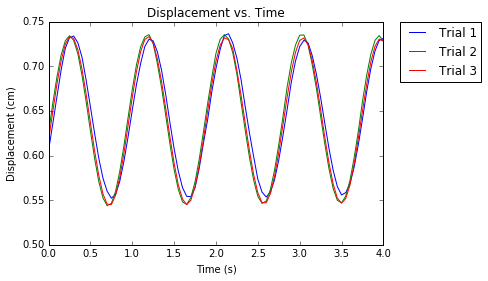

In [3]:
time, y1 = np.loadtxt('Y1-M2-T1.txt', unpack=True, skiprows=7, usecols=[0, 1])
y3 = np.loadtxt('Y1-M2-T3.txt', unpack=True, skiprows=7, usecols=[1])
y4 = np.loadtxt('Y1-M2-T4.txt', unpack=True, skiprows=7, usecols=[1])

plt.plot(time,y1,label='Trial 1')
plt.plot(time,y3,label='Trial 2')
plt.plot(time,y4,label='Trial 3')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs. Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('UD_traj.png')

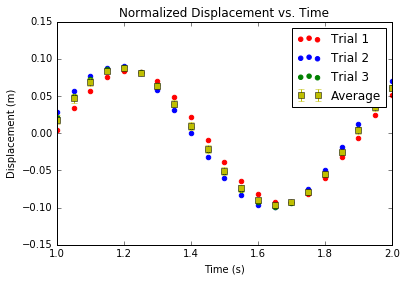

In [60]:
y1 = y1 - np.mean(y1)
y3 = y3 - np.mean(y3)
y4 = y4 - np.mean(y4)

fig, ax = plt.subplots()
ax.scatter(time, y1,edgecolor='r',c='r',label='Trial 1')
ax.scatter(time, y3,edgecolor = 'b',c='b',label='Trial 2')
ax.scatter(time, y4,edgecolor = 'g',c='g',label='Trial 3')
ax.errorbar(time, yavg, yerr, color='y', fmt='s', label='Average')
ax.set_xlim(1,2)
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
plt.title('Normalized Displacement vs. Time')
plt.legend()
plt.savefig('UD_norm.png')

In [56]:
yavg = np.zeros_like(y1)
yerr = np.zeros_like(y1)
for ii in range(len(y1)):
    yavg[ii] = np.mean([y1[ii], y3[ii], y4[ii]])
    yerr[ii] = np.std([y1[ii], y3[ii], y4[ii]]) / np.sqrt(3)

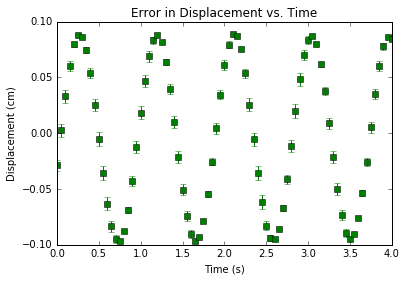

In [61]:
plt.errorbar(time, yavg, yerr, color='g', fmt='s')
plt.xlim()
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Error in Displacement vs. Time')
plt.savefig('UD_err.png')

## Undamped Uncertainty

In [7]:
def shm(time, A, omega, gamma):
    ymodel = A * np.cos(omega * time - gamma)
    return ymodel

In [8]:
param, pcov = curve_fit(shm, time, yavg, sigma=yerr, p0=[0.06, 2*np.pi/1.0, 0.5])
perr = np.sqrt(np.diag(pcov)) # this is the diagonal of the covariance matrix scaled by the chi^2
print(param, perr)

(array([ 0.09060105,  6.83145734,  1.90198278]), array([ 0.00065271,  0.01204318,  0.03222746]))


In [9]:
ymodel = shm(time, param[0], param[1], param[2])

In [10]:
chisq = np.sum( (yavg - ymodel)**2 / yerr**2 ) / (len(yavg) - 3)
print(chisq)
perr = perr * np.sqrt(chisq) # underestimating data which is why we multiply by perr

8.23544190969


In [11]:
print(param, perr)

(array([ 0.09060105,  6.83145734,  1.90198278]), array([ 0.00187311,  0.03456086,  0.09248463]))


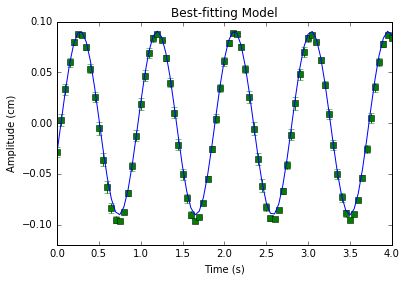

In [14]:
fig, ax = plt.subplots()
ax.errorbar(time, yavg, yerr, color='g', fmt='s')
ax.plot(time, ymodel)
#ax.set_xlim(2, 7)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (cm)')
plt.title('Best-fitting Model')
ax.set_ylim(-0.12,0.1)
plt.savefig('UD_err_traj.png')

In [15]:
# Find value of spring constant
k = (param[1])**2 * 0.751
print k

35.0482758957


## Damped Oscillations D1

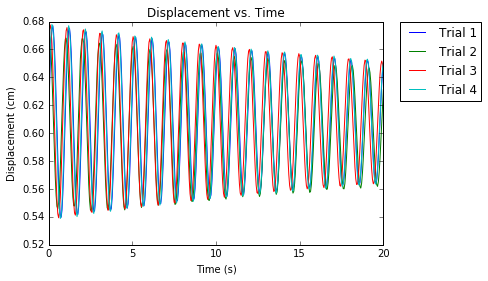

In [74]:
time2, y11 = np.loadtxt('D1-M3-T1.txt', unpack=True, skiprows=7, usecols=[0, 1])
y22 = np.loadtxt('D1-M3-T2.txt', unpack=True, skiprows=7, usecols=[1])
y44 = np.loadtxt('D1-M3-T4.txt', unpack=True, skiprows=7, usecols=[1])
y55 = np.loadtxt('D1-M3-T5.txt', unpack=True, skiprows=7, usecols=[1])

plt.plot(time2,y11,label='Trial 1')
plt.plot(time2,y22,label='Trial 2')
plt.plot(time2,y44,label='Trial 3')
plt.plot(time2,y55,label='Trial 4')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs. Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('D_traj.png')

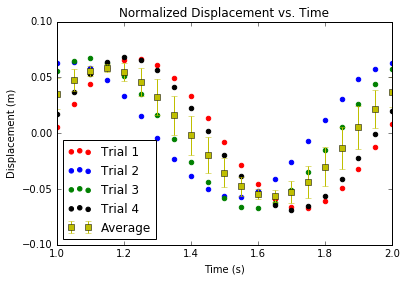

In [79]:
y11 = y11 - np.mean(y11)
y22 = y22 - np.mean(y22)
y44 = y44 - np.mean(y44)
y55 = y55 - np.mean(y55)

fig, ax = plt.subplots()
ax.scatter(time2, y11,edgecolor='r',c='r',label='Trial 1')
ax.scatter(time2, y22,edgecolor = 'b',c='b',label='Trial 2')
ax.scatter(time2, y44,edgecolor = 'g',c='g',label='Trial 3')
ax.scatter(time2, y55,edgecolor = 'k',c='k',label='Trial 4')
ax.errorbar(time2, yavg2, yerr2, color='y', fmt='s', label='Average')
ax.set_xlim(1,2)
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')
plt.title('Normalized Displacement vs. Time')
plt.legend(loc='lower left')
plt.savefig('D_norm.png')

In [77]:
yavg2 = np.zeros_like(y1)
yerr2 = np.zeros_like(y1)
for ii in range(len(y1)):
    yavg2[ii] = np.mean([y1[ii], y2[ii], y4[ii], y5[ii]])
    yerr2[ii] = np.std([y1[ii], y2[ii], y4[ii], y5[ii]]) / np.sqrt(3)

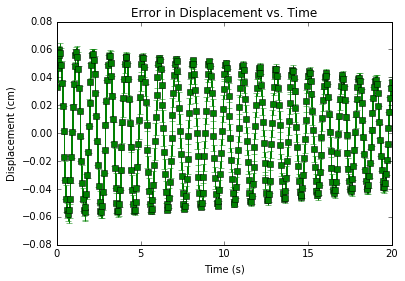

In [19]:
plt.errorbar(time2, yavg2, yerr2, color='g', fmt='s')
plt.xlim()
plt.xlabel('Time (s)')
plt.ylabel('Displacement (cm)')
plt.title('Error in Displacement vs. Time')
plt.savefig('UD_err.png')

## Damped Uncertainty

In [20]:
def d_shm(time2, A, omega, gamma, beta):
    ymodel2 = A * np.exp(-beta*time2) * np.cos(omega * time2 - gamma)
    return ymodel2

In [85]:
d_param, d_pcov = curve_fit(d_shm, time2, yavg2, sigma=yerr2, p0=[0.06, 2*np.pi/1.0, 0.5,0.1])
d_perr = np.sqrt(np.diag(d_pcov)) # this is the diagonal of the covariance matrix scaled by the chi^2
print(d_param, d_perr)

(array([ 0.06235486,  6.32025296,  0.94551557,  0.0215373 ]), array([ 0.0001731 ,  0.00066842,  0.00767865,  0.00026241]))


In [81]:
ymodel2 = d_shm(time2, d_param[0], d_param[1], d_param[2], d_param[3])

In [82]:
d_chisq = np.sum( (yavg2 - ymodel2)**2 / yerr2**2 ) / (len(yavg2) - 3)
print(d_chisq)
d_perr = d_perr * np.sqrt(d_chisq) # underestimating data which is why we multiply by perr

0.0703698232507


In [83]:
print(d_param, d_perr)

(array([ 0.06235486,  6.32025296,  0.94551557,  0.0215373 ]), array([  4.59199802e-05,   1.77313688e-04,   2.03694011e-03,
         6.96100389e-05]))


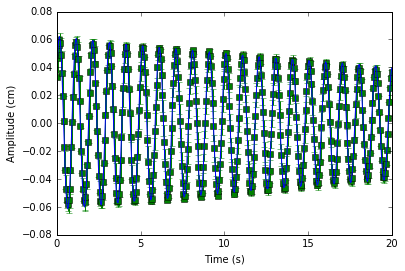

In [25]:
fig, ax = plt.subplots()
ax.errorbar(time2, yavg2, yerr2, color='g', fmt='s')
ax.plot(time2, ymodel2)
#ax.set_xlim(2, 7)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (cm)')
plt.savefig('D_err_traj1.png')

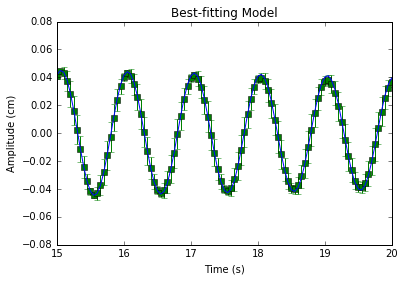

In [26]:
fig, ax = plt.subplots()
ax.errorbar(time2, yavg2, yerr2, color='g', fmt='s')
ax.plot(time2, ymodel2)
#ax.set_xlim(2, 7)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (cm)')
plt.title('Best-fitting Model')
ax.set_xlim(15,20)
plt.savefig('D_err_traj.png')

In [27]:
# Find value of spring constant
k = (d_param[1])**2 * 0.852
print k

34.0336491022
